## Prueba Simulacion - Casos Covid19 - Brasil

### Nombre: Nicolas Añazco

### Objetivo:

•	Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones.

### Enunciado:

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Investigar los datos de los países contagiados por COVID-19, especialmente de Latinoamérica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:
▪	Generar un modelo matemático de predicción para regresión lineal, exponencial, polinómico y logarítmico, de los nuevos contactos en la próxima semana (7 días después).
▪	Generar un modelo probabilístico con los datos.
▪	Finalmente, contrarrestar los modelos matemáticos y generar las siguientes conclusiones
•	Cual tiene una mejor predicción
•	Ventajas y desventajas de los modelos.
•	Cuál es el principal problema del modelo probabilístico
•	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
◦	Se debe establecer un modelo basado en modelos matemáticos y probabilísticos.
◦	El programa deberá generar gráficas que indiquen la ecuación matemática y probabilística de tendencias.
◦	Deben calcularse las siguientes métricas:
▪	Total, de infectados dentro de 7 días (matemático y probabilístico).

Finalmente, desarrollar dentro de un cuaderno de Jupyter Notebook, generar un PDF y subir al repositorio.

La fecha de entrega es 24/11/20 antes o igual de las 13:00.


### DESARROLLO DE LOS MODELOS

## Importacion de Librerias

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
#from scipy.optimize import solve
from sklearn import linear_model
#%matlplotlibe inline
from sklearn.linear_model import LogisticRegression
from pylab import *
import sympy as sp 
import matplotlib.pyplot as plt
from sklearn import linear_model #Regresion Lineal con sklearn

Casos de infectados hasta 23/11/2020 en Brasil
6071401.0


Text(0.5, 1.0, 'Contagiados Covid-19 Brasil')

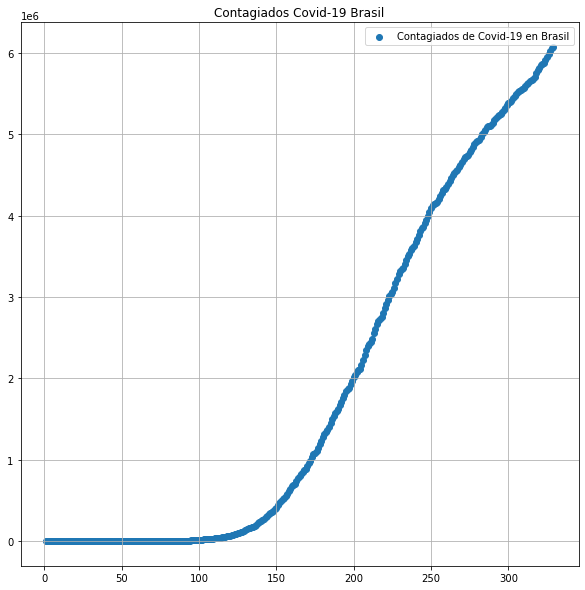

In [78]:

from datetime import datetime,timedelta

url = "brasil-covid-data.csv"

df = pd.read_csv(url).fillna(0)
df = df[df['location'].isin(['Brazil'])]
df = df.loc[:,['date', 'total_cases']]

FMT = '%Y-%m-%d'
date= df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

x = np.arange(1, len(df)+1,1)
y = np.array(df.values[:,1], dtype='float')

print("Casos de infectados hasta 23/11/2020 en Brasil")
print(y[len(y)-1])
plt.scatter(x,y, label="Contagiados de Covid-19 en Brasil")
plt.grid(True)
plt.legend()
plt.title("Contagiados Covid-19 Brasil")

## Modelo Lineal

Ecuacion de la Recta f(x) = MX + B
M = [1.], b = 4.656612873077393e-10
Predicción a 7 dias
5507955


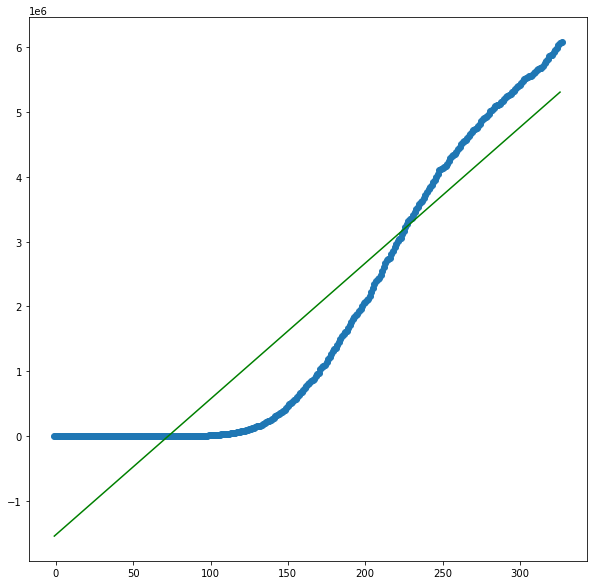

In [81]:

x = list(df.iloc [:, 0])
y = list(df.iloc [:, 1])

regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
y_prediccion = regr.predict([[len(x)+7]])

print("Ecuacion de la Recta f(x) = MX + B")
print('M = ' + str(regresion.coef_) + ', b = '+ str(regresion.intercept_))
print("Predicción a 7 dias")
print(int(y_prediccion))
plt.scatter(x, y)
x_real = np.array(range(min(x), max(x)))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green', label="Predicion")
plt.show()

## Modelo Logistico

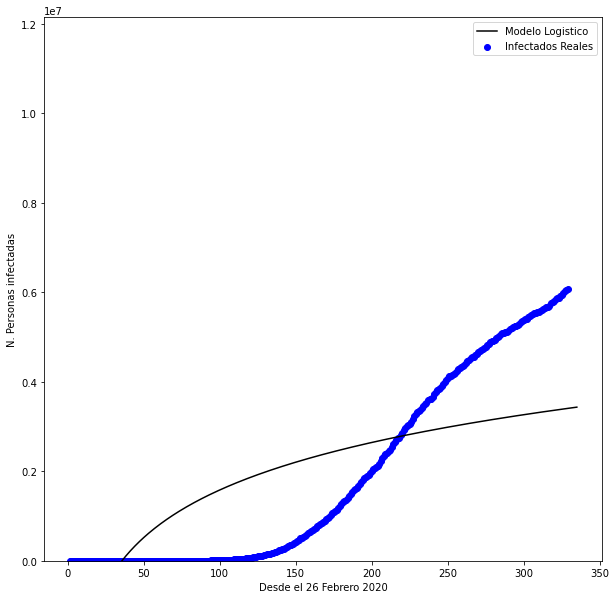

Predecir a una semana
3432121.5000614794


In [52]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression  

def modelo_logistico(x,a,b):
    return a+b*np.log(x)

x=np.arange(1,len(df)+1,1)
y=np.array(df.values[:,1])

exp_fit = curve_fit(modelo_logistico,x,y)

pred_x = list(range(min(x),max(x)+7))
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=10)

plt.scatter(x,y,label="Infectados Reales",color="blue")

val = [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico",color="black")
plt.legend()
plt.xlabel("Desde el 26 Febrero 2020")
plt.ylabel("N. Personas infectadas")
plt.ylim(0,max(y)*2)
plt.show()
print("Predecir a una semana")
print(val[len(pred_x)-1])

## Modelo Exponencial

[ 0.01909433 10.14830163]
16858658.15665163


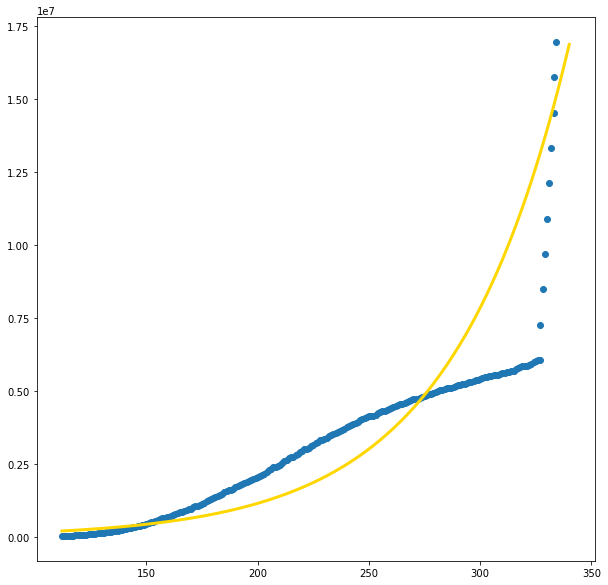

In [92]:
from scipy.optimize import curve_fit

x = x[56:len(x)-1]
y = y[56:len(y)-1]

curve_fit=np.polyfit(x,np.log(y),deg=1)
print(curve_fit)

pred_x=np.array(list(range(min(x),max(x)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx,color='gold',linewidth=3.0)
print(yx[len(yx)-1])

## Modelo Polinomial

           5           4         3         2
4.776e-05 x - 0.03507 x + 8.478 x - 655.7 x + 1.806e+04 x - 1.159e+05


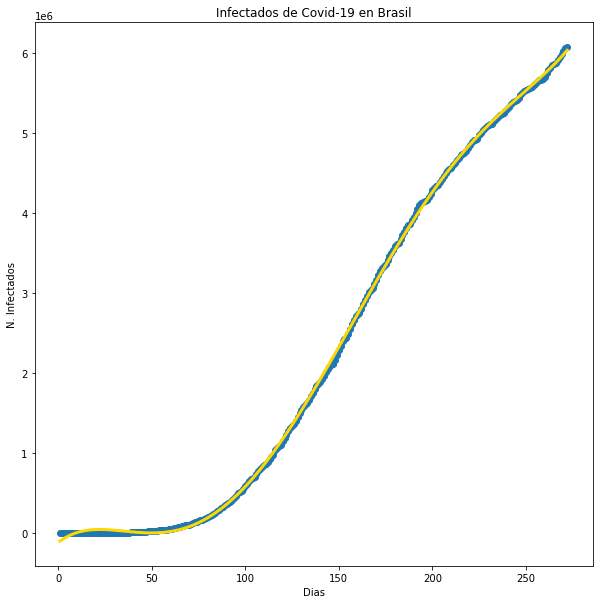

Prediccion:  6235552.94303


In [73]:
df = pd.read_csv('brasil-covid-data.csv').fillna(0)
ndf= df.loc[(df['location'] == 'Brazil') & (df['total_cases'] != 0)]
ndf1=ndf[['date','total_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float')
y=np.array(ndf1.values[:,1], dtype='float')
fun_pol = np.poly1d(np.polyfit(x, y, 5))
print(fun_pol)

y_prediccion=fun_pol(x)

plt.scatter(x, y)
plt.plot(x, y_prediccion, c='gold',lw=3)  
plt.title("Infectados de Covid-19 en Brasil")
plt.xlabel('Dias')
plt.ylabel('N. Infectados')
plt.show()

print("Prediccion: " , round(fun_pol(len(x)+7),5))

## Modelo Probabilistico

In [82]:
url = 'brasil-covid-data.csv'
df = pd.read_csv(url).fillna(0) 
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58693,0,0,International,2020-11-19,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
58694,0,0,International,2020-11-20,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
58695,0,0,International,2020-11-21,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
58696,0,0,International,2020-11-22,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


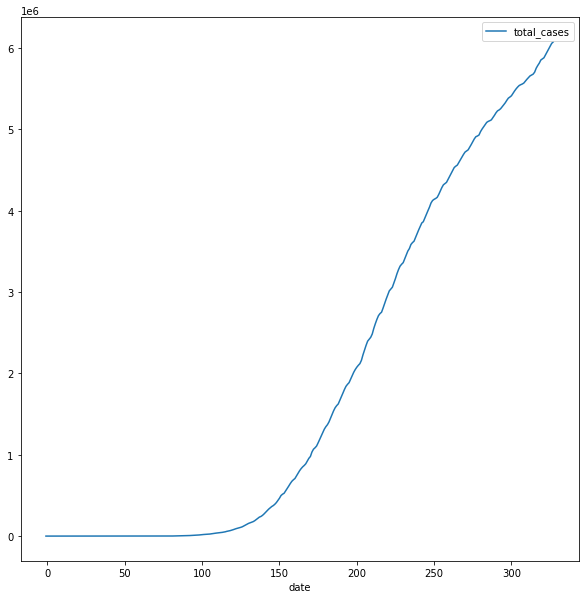

In [84]:

df = df[df['location'].isin(['Brazil'])]
df = df.loc[:,['date','total_cases']]
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df
df.plot(x ='date', y='total_cases')

In [85]:
filtro = df["total_cases"][27:] 
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

url = 'brasil-covid-data.csv'
df = pd.read_csv(url).fillna(0) 
df = df[df['location'].isin(['Brazil'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)
y = list(df.iloc [:, 1]) 
x = list(df.iloc [:, 0]) 


#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

1208372.5
2062755.2185430464
7279773


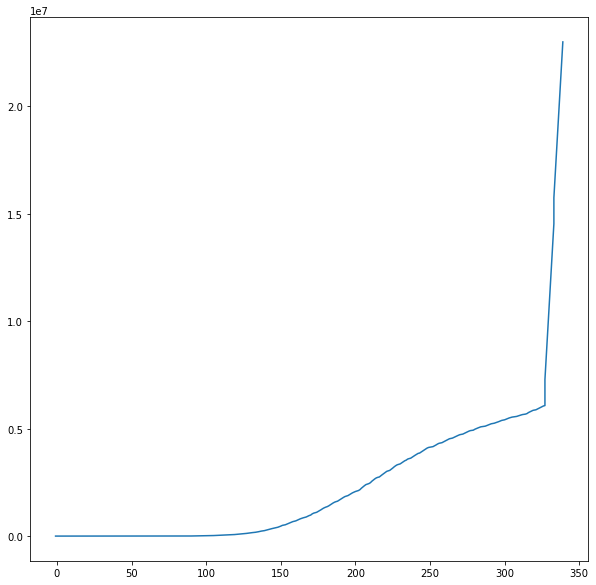

Prediccion
24196981


In [87]:
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
prediccion_siguiente = int(y[-1] + mediana)
plt.plot(x, y)
plt.show()
print("Prediccion")
print(prediccion_siguiente)

## Conclusiones 
### •	Cual tiene una mejor predicción

El modelo que presenta una mejor prediccion es el Modelo Polinomial ya que este permite ajustarse y predecir de una manera mas correcta los datos.

### •	Ventajas y desventajas de los modelos.

#### Ventajas

Modelo lineal:
    
    * La ecuacion lineal es facil de interpretar y utilizar.
    * Facil de entender y explicar.
    * Es implementado mayormente con datos que no tienen mucha informacion para una aporximacion asertada
    
Modelo Logaritmico:

    * Emplea una funcion logaritmica que permite determina valores que presenta un crecimineto a inicios y mantienen con un crecimineto estable.
    * Tiene un entrenamiento rapido y rara vez existe un sobreajuste
    
Modelo Exponencial:
    
    * Proporciona información adecuada justamente porque están diseñadas para valores y crecimientos rápidos.
    
Modelo Polinomial:

    * Este modelo sirve oara cualquien tamaño de muestra de datos
    * Trabaja bien con datos no lineales 
    * El modelo polinomial permite incorporar una funcion lineal como inicio y ajustarla a un modelo polinomico con de un     grado n a patir de la ecuacion lineal.
    
Modelo Probabilistico:
    
    * El calculo es rápido de medidas y varianzas.
    * El muestreo probabilístico es sencillo y de fácil comprensión para su utilizacion.


#### Desventajas

Modelo lineal:

    * No se pueden capturar relaciones no lineales sin transformar la entrada, por lo que tienes que trabajar duro para que se ajuste a f funciones no lineales.

Modelo Logaritmico:

    * Este modelo puede ser empleado siempre y cuando los datos se ajuste a un determida crecimiento y se mantengan estables de forma creciente. 

Modelo Exponencial:

    * Presenta un crecimineto que aumenta de forma exponecial es decir los datos son representados para un crecimineto            positivo o imparable para los datos.

Modelo Polinomial:

    * El modelo polinomial puede ser empleado con datos grandes pero el grando recomendado para la ecuaciones es de 3 o 4
    * Se requiere elegir el grado correcto del polinomio para una buena relación sesgo/varianza.

Modelo Probabilistico:

    * Existe un gran margen de error en las predicciones.
    * Si trabajamos con muestras pequeñas es posible que no se represente correctamente a toda la población adecuadamente,    es por esto que se debe manejar un muestreo completo.




### •	Cuál es el principal problema del modelo probabilístico

Uno de los principales problemas que existen en el modelo probabilistico es que cuando se trabaja con valores demasiado grandes este tiende a cometer errores en los calculos y no sirve para predecir de manera correcta, en cambio trabajando con valores pequeños trabaja adecuadamente.
